In [1]:
import os
import sys

# Add the parent directory to the system path
sys.path.append("../")
sys.path.append("../synthoseis")

In [2]:
import synthoseis.main as mn 
import numpy as np
import json
import pprint as pp
import h5py as hdf
import matplotlib.pyplot as plt

/home/spaceswimmer/miniconda3/envs/synthoseis/lib/python3.12/site-packages/bruges/__init__.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [3]:
rock_model = json.load(open('../config/example.json', 'r'))
pp.pprint(rock_model)

{'bandwidth_high': [20.0, 35.0],
 'bandwidth_low': [3.0, 6.0],
 'bandwidth_ord': 4,
 'basin_floor_fans': False,
 'broadband_qc_volume': False,
 'closure_types': ['simple', 'faulted', 'onlap'],
 'cube_shape': [300, 300, 1250],
 'digi': 4,
 'dip_factor_max': 2,
 'extra_qc_plots': True,
 'incident_angles': [7, 15, 24],
 'include_channels': False,
 'include_salt': True,
 'infill_factor': 10,
 'initial_layer_stdev': [7.0, 25.0],
 'max_column_height': [150.0, 150.0],
 'max_number_faults': 6,
 'min_closure_voxels_faulted': 2500,
 'min_closure_voxels_onlap': 500,
 'min_closure_voxels_simple': 500,
 'min_number_faults': 1,
 'model_qc_volumes': True,
 'multiprocess_bp': True,
 'pad_samples': 10,
 'partial_voxels': True,
 'project': 'example',
 'project_folder': '../data/test',
 'sand_layer_fraction': {'max': 0.25, 'min': 0.05},
 'sand_layer_thickness': 2,
 'seabed_min_depth': [20, 50],
 'signal_to_noise_ratio_db': [7.5, 12.5, 17.5],
 'thickness_max': 12,
 'thickness_min': 2,
 'variable_shale_ng'

In [ ]:
mn.build_model(user_json='../config/example.json', test_mode=200, run_id=3)

------------------------------------
Testing Mode
Output Folder: ../data/synthetic_data/temp/test_test_mode_
Cube_Shape: (400, 400, 1250)
------------------------------------
Coherent frowns will be inserted
Salt will be NOT be inserted.

Model folder: ../data/synthetic_data/temp/test_test_mode_/seismic__2025.96274857_3
Creating directory: ../data/synthetic_data/temp/test_test_mode_/seismic__2025.96274857_3
Creating directory: /home/spaceswimmer/Documents/FWI-DL/data/synthetic_data/temp/temp_folder__2025.96274857_3_3__2025.96274857

Keyfile created at ../data/synthetic_data/temp/test_test_mode_/seismic__2025.96274857_3/seismicCube_2025.96274857.key
self.cfg.num_lyr_lut =  25000
onlap_layer_list =  [  7  52 151 180 193]
Number of onlapping flags: 5
 ... horizon number for first onlap episode = 7
 ... number of channelFlags: 0
 ... horizon number for first channel episode: 0
	Indices for shallowest point in cube: 0, 0
Building random depth map at base of model
azi, dip, dipping_plane min

/home/spaceswimmer/Documents/FWI-DL/src/../synthoseis/datagenerator/util.py:115: UserWarning:

Ignoring specified arguments in this call because figure with num: 1 already exists



In [38]:
seismic = np.load('../data/synthetic_data/temp/test_test_mode_/seismic__2025.96192465_2/seismicCubes_cumsum__0_degrees_normalized_2025.96192465.npy')
geology = np.load('../data/synthetic_data/temp/test_test_mode_/seismic__2025.96192465_2/qc_volume_vp_2025.96192465.npy')
print(geology.shape)

(100, 100, 1260)


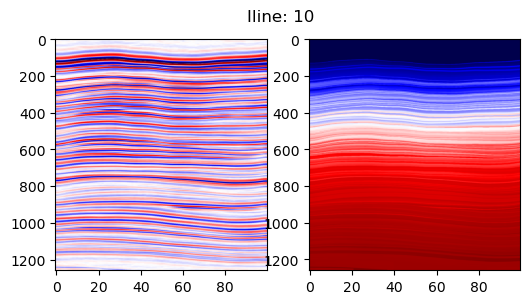

In [39]:
fig, axs = plt.subplots(1,2, figsize=(6,3))
iline = 10


fig.suptitle(f'Iline: {iline}')
axs[0].imshow(seismic[iline,:,:].T, cmap=plt.cm.seismic, aspect='auto')
axs[1].imshow(geology[iline,...].T, cmap=plt.cm.seismic, aspect='auto')
plt.show()